# Data Visualization of Dow Jones Index

Visualization Created by Dipti Muni
Last Update: 1-24-2018

#### Data Source: 
Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.

http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index#


Following information from dow_jones_index.names:

1) __Title:__ Weekly stock data for Dow Jones Index

2) __Source:__ This dataset comprises data reported by the major stock exchanges.

3) __Past Usage this dataset was first used in:__

Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.

We request that you provide a citation to this paper when using the dataset.  We welcome you to 
compare your results against ours in (Brown, Pelosi & Dirska, 2013).

4) __Relevant Information:__

In predicting stock prices you collect data over some period of time - day, week, month, etc. But you cannot take advantage of data from a time period until the next increment of the time period. For example, assume you collect data daily.  When Monday is over you have all of the data for that day.  However you can't invest on Monday, because you don't get the data until the end of the day.  You can use the data from Monday to invest on Tuesday.  

In our research, each record (row) is data for a week.  Each record also has the percentage of return that stock has in the following week (percent_change_next_weeks_price). Ideally, you want to determine which stock will produce the greatest rate of return in the following week.  This can help you train and test your algorithm.

Some of these attributes might not be use used in your research.  They were originally added to our database to perform calculations.  (Brown, Pelosi & Dirska, 2013) used percent_change_price, percent_change_volume_over_last_wk, days_to_next_dividend, and percent_return_next_dividend.  We left the other attributes in the dataset in case you wanted to use any of them. Of course what you want to maximize is percent_change_next_weeks_price.

Training data vs Test data: In (Brown, Pelosi & Dirska, 2013) we used quarter 1 (Jan-Mar) data for training and quarter 2 (Apr-Jun) data for testing.

Interesting data points: If you use quarter 2 data for testing, you will notice something interesting in the week ending 5/27/2011 every Dow Jones Index stock lost money.

The Dow Jones Index stocks change over time.  The stocks that made up the index in 2011 were:
      - 3M		              MMM
        American Express 	  AXP
		Alcoa			      AA
		AT&T 			      T
		Bank of America		  BAC
		Boeing 		 	      BA
		Caterpillar 	 	  CAT
		Chevron 	 	      CVX
		Cisco Systems 		  CSCO
		Coca-Cola 	 	      KO
		DuPont 		 	      DD
		ExxonMobil 	 	      XOM
		General Electric 	  GE
		Hewlett-Packard		  HPQ
		The Home Depot 	 	  HD
		Intel 		 	      INTC
		IBM 		 	      IBM
		Johnson & Johnson 	  JNJ	
		JPMorgan Chase 	 	  JPM
		Kraft			      KRFT
		McDonald's 		      MCD
		Merck 		 	      MRK
		Microsoft 	 	      MSFT
		Pfizer 		 	      PFE
		Procter & Gamble 	  PG
		Travelers 	 	      TRV
		United Technologies   UTX
		Verizon 	 	      VZ
        Wal-Mart 	          WMT
		Walt Disney 	 	  DIS
  

5) __Number of Instances:__

There are 750 data records.  360 are from the first quarter of the year (Jan to Mar). 390 are from the second quarter of the year (Apr to Jun).

6) __Number of Attributes:__ There are 16 attributes. 

7) __For each Attribute__
 - quarter:  the yearly quarter (1 = Jan-Mar; 2 = Apr=Jun).
 - stock: the stock symbol (see above)
 - date: the last business day of the work (this is typically a Friday)
 - open: the price of the stock at the beginning of the week
 - high: the highest price of the stock during the week
 - low: the lowest price of the stock during the week
 - close: the price of the stock at the end of the week
 - volume: the number of shares of stock that traded hands in the week
 - percent_change_price: the percentage change in price throughout the week
 - percent_change_volume_over_last_wek: the percentage change in the number of shares of stock that traded hands for       this week compared to the previous week
 - previous_weeks_volume: the number of shares of stock that traded hands in the previous week
 - next_weeks_open: the opening price of the stock in the following week
 - next_weeks_close: the closing price of the stock in the following week
 - percent_change_next_weeks_price: the percentage change in price of the stock in the following week.
 - days_to_next_dividend: the number of days until the next dividend
 - percent_return_next_dividend: the percentage of return on the next dividend


8) __Missing Attribute Values:__ None



## Preparing and Reviewing the Data

In [19]:
#All imports go here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# read the file
df = pd.read_csv('dow_jones_index.csv')
df.head(10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/11,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/11,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/11,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/11,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/11,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/11,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/11,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/11,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/11,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/11,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [3]:
#check names of attributes
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [4]:
#check length of rows
len(df)

750

In [5]:
#check how many columns
len(df.columns)

16

In [6]:
#show data for one stock for both quarters
dis_df = df[df.stock == 'DIS']
print(dis_df[['quarter', 'stock', 'volume']])

     quarter stock    volume
96         1   DIS  72917621
97         1   DIS  31943413
98         1   DIS  36187032
99         1   DIS  42131642
100        1   DIS  53521486
101        1   DIS  83975520
102        1   DIS  33868302
103        1   DIS  56966763
104        1   DIS  53096584
105        1   DIS  41229388
106        1   DIS  65060004
107        1   DIS  40696371
464        2   DIS  34130223
465        2   DIS  39055258
466        2   DIS  40820710
467        2   DIS  24312043
468        2   DIS  30122091
469        2   DIS  35369886
470        2   DIS  78855110
471        2   DIS  50988843
472        2   DIS  34651349
473        2   DIS  52169227
474        2   DIS  49099516
475        2   DIS  54513950
476        2   DIS  50409504


In [7]:
#show data for each quarter.
# q1 = First Quarter 
# q2 = Second Quarter
dis_q1 = dis_df[dis_df.quarter == 1]
dis_q1[['quarter', 'stock', 'date', 'volume']]

,quarter,stock,date,volume
96,1,DIS,1/7/11,72917621
97,1,DIS,1/14/11,31943413
98,1,DIS,1/21/11,36187032
99,1,DIS,1/28/11,42131642
100,1,DIS,2/4/11,53521486
101,1,DIS,2/11/11,83975520
102,1,DIS,2/18/11,33868302
103,1,DIS,2/25/11,56966763
104,1,DIS,3/4/11,53096584
105,1,DIS,3/11/11,41229388


In [8]:
dis_q2 = dis_df[dis_df.quarter == 2]
dis_q2[['quarter', 'stock', 'date', 'volume']]

,quarter,stock,date,volume
464,2,DIS,4/1/11,34130223
465,2,DIS,4/8/11,39055258
466,2,DIS,4/15/11,40820710
467,2,DIS,4/21/11,24312043
468,2,DIS,4/29/11,30122091
469,2,DIS,5/6/11,35369886
470,2,DIS,5/13/11,78855110
471,2,DIS,5/20/11,50988843
472,2,DIS,5/27/11,34651349
473,2,DIS,6/3/11,52169227


## Visualizing the Data

### Line Plots

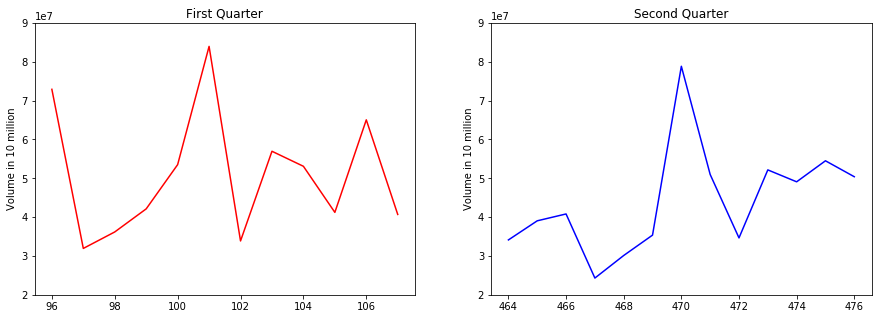

In [9]:
#Plot 2 line plots within one plot comparing the two quarters'volume
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(dis_q1['volume'], color = 'red')
plt.ylim([20000000, 90000000])
plt.ylabel('Volume in 10 million')
plt.title('First Quarter')

plt.subplot(1, 2, 2)
plt.plot(dis_q2['volume'], color = 'blue')
plt.ylim([20000000, 90000000])
plt.ylabel('Volume in 10 million')
plt.title('Second Quarter')

plt.show()


#### __What story does the First Quarter and Second Quarter line plot tell?__

##### - Here we are looking at the volume of stocks traded in Dow Jones Index for each quarter. The volume is collected at the end of each week. In first quarter, we had 12 weeks and in second quarter, we had 13 weeks.  

#####  - The Dow Jones Industrial Average is a price-weighted measure of 30 US blue-chip companies and it covers all industries except transportation and utilities. 

#####  - Traders and investers track volume levels to help decide when to buy and sell stocks. You can use line plot to show a summary statistic over time.

##### -  After examining the first quarter line plot, I can tell the stocks are steadily inscreasing over time after the big dip in the beginning of the first quarter to 30 million and then ending the quarter near 40 million. 

#####  - After examining the second quarter line plot, I can tell the stocks were inscreasing well over time from near 35 million to 50 million. 

#####  - According the the article, "How to Use Volume to Improve Your Trading" by Cory Mitchell, the rising volume gives a sign of rising market. Be careful of increasing price and decreasing volume which signals lack of interest and potential reversal in price change. We will look at volume and price change later. 

_Source: https://www.investopedia.com/articles/technical/02/010702.asp_


### Box Plots

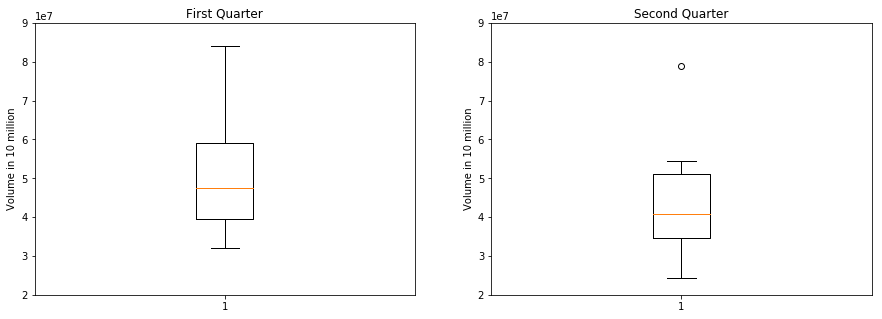

In [10]:
#Plot 2 line plots within one plot comparing the two quarters'volume
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(dis_q1['volume'])
plt.ylim([20000000, 90000000])
plt.ylabel('Volume in 10 million')
plt.title('First Quarter')

plt.subplot(1, 2, 2)
plt.boxplot(dis_q2['volume'])
plt.ylim([20000000, 90000000])
plt.ylabel('Volume in 10 million')
plt.title('Second Quarter')

plt.show()

/Users/dmuni/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


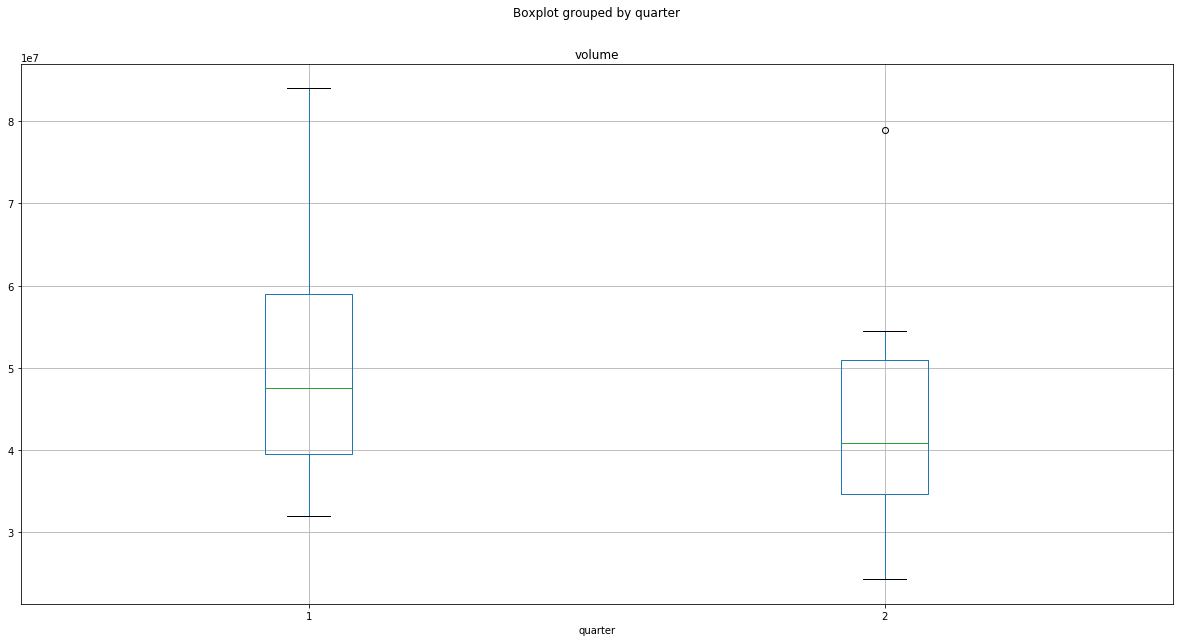

In [22]:
dis_df.boxplot(column='volume', by = 'quarter')

#### __Comparsion between Two Quarters and Identify any Outliers and Extreme values in Walt Disney Stocks__

##### - First Quarter compare to Second Quarter had greater range of values, median being at least 75% higher. 
##### - Second quarter has one outlier near 80 million volume. So during one week about 80 million volume was traded. 
##### -  The approximate range of volume traded in first quarter is about 30 million to 80 million. That is about 50 million volumes of stock traded.
##### -  The approximate range of volume traded in Second Quarter is about 20 million to 50 million. That is about 30 million volumes of stock traded.


### Histograms

The histogram is a great tool for showing the possible values of a variable, in this example, the volume, as well as how common those values are. 

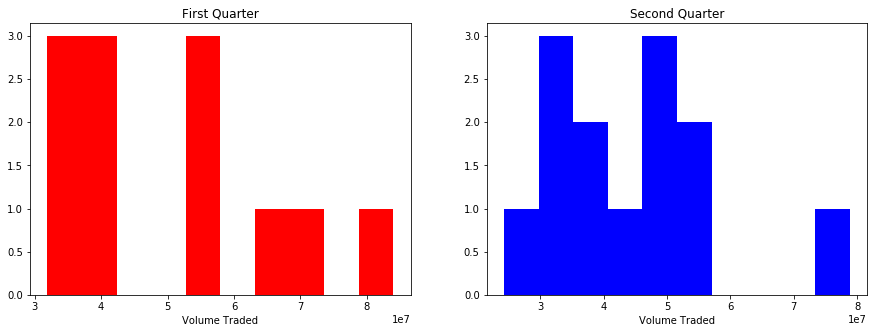

In [12]:
#Plot individual histograms for each of the two quarters
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(dis_q1['volume'], color='red')
plt.title('First Quarter')
plt.xlabel('Volume Traded')

plt.subplot(1, 2, 2)
plt.hist(dis_q2['volume'], color='blue')
plt.title('Second Quarter')
plt.xlabel('Volume Traded')

plt.show()

#### Seeing the Frequency of Volumes in Walt Disney Stock for each Quarters

##### - In First Quarter, we see that volume ranging from 30 million to 40 million appeared 3 times. Volume ranging from 50 to 60 appeared 3 times. Volume ranging from 60 to 70 appeared once and from 80 mil on appeared once as well. 
##### - In Second Quarter, we we that volume ranging from 20 million to 30 million appeared once, between 30 to 40 appeared 5 times, 40 to 50 appeared 4 times, 50 to 60 appeared 2 times, and 70 to 80 appeared once. 
##### - From all this we can conclude that high volumes (above 60 million) are not traded very frequently. 


### Line Plots



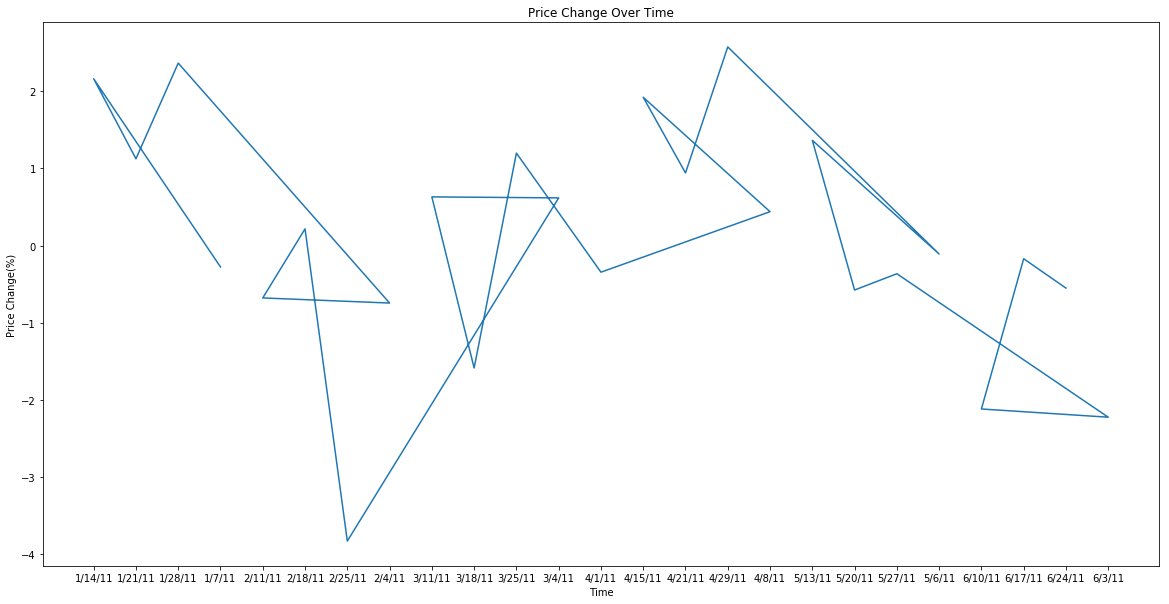

In [20]:
#line plot for Walmart for percent_change_price where x-axis has the time and y-axis has the percent_change_price.
walmart_df = df[df.stock == 'WMT']
plt.plot(walmart_df['date'], walmart_df['percent_change_price'])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('Price Change Over Time')
plt.show()


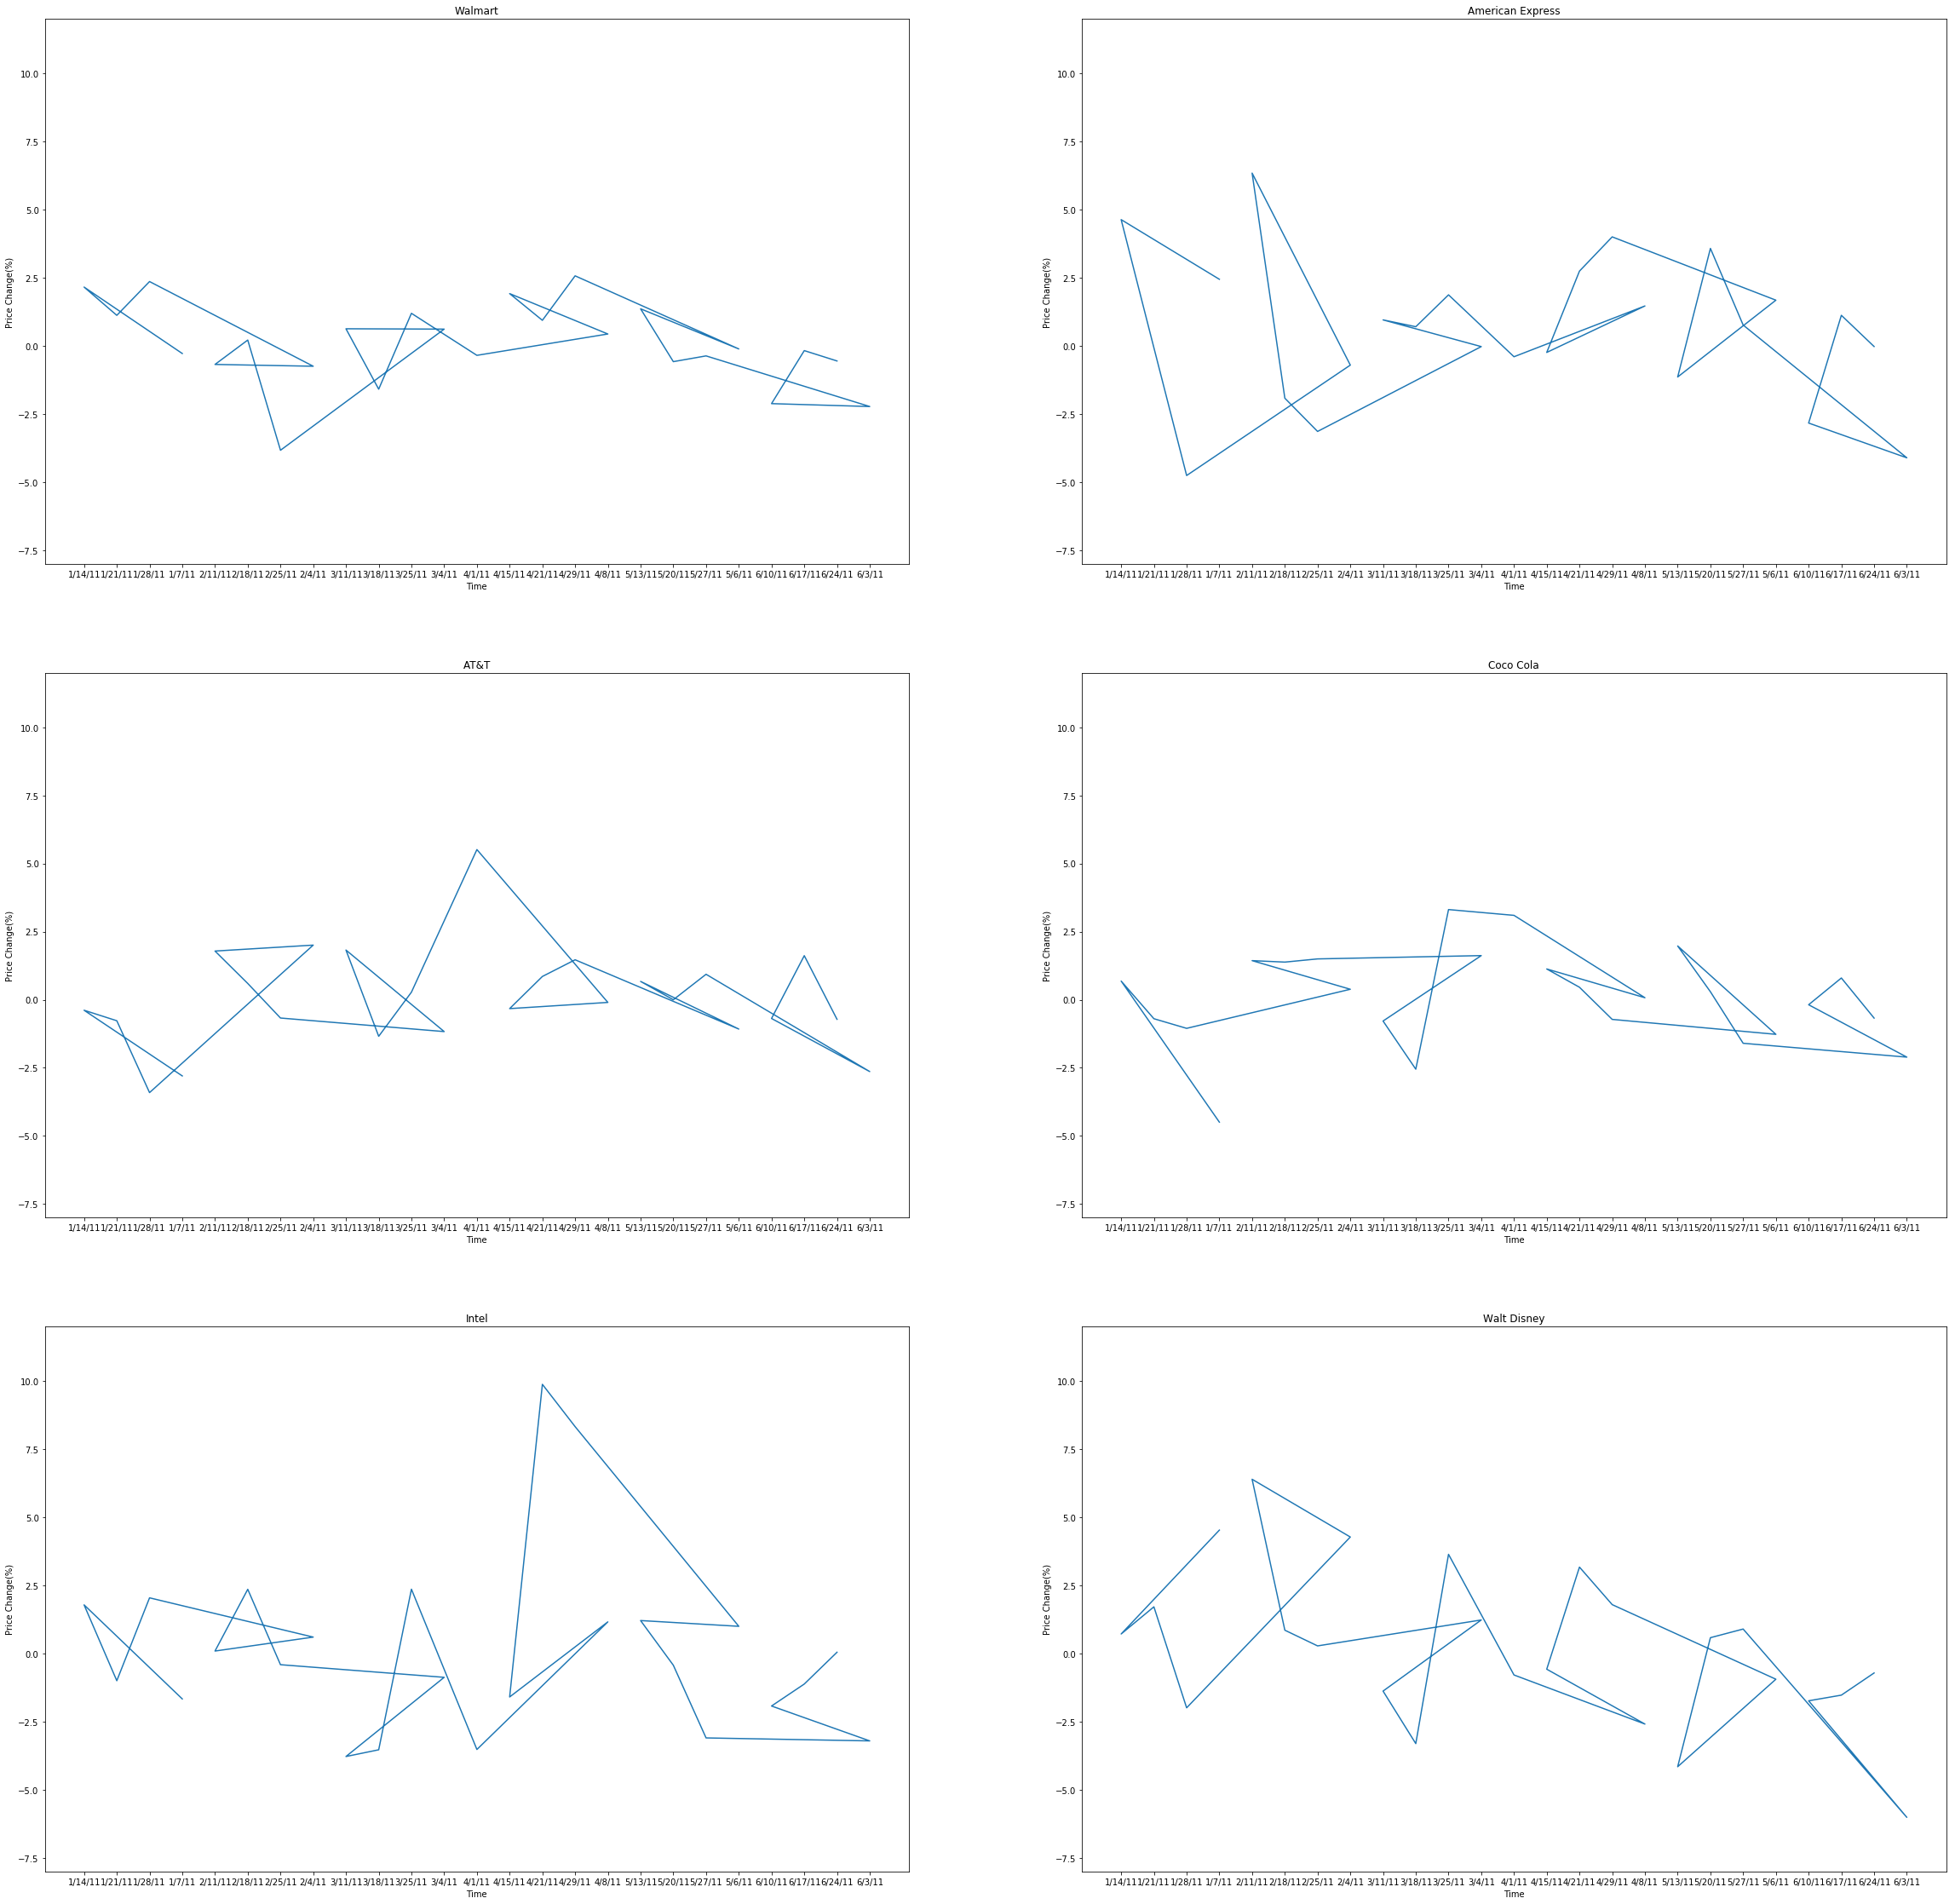

In [27]:
#draw the line plots for 6 stocks (including above) in one plot : 
plt.figure(figsize=(40, 40))

#Walmart Stock
plt.subplot(3, 2, 1)
walmart_df = df[df.stock == 'WMT']
plt.plot(walmart_df['date'], walmart_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('Walmart')

#American Express Stock
plt.subplot(3, 2, 2)
amex_df = df[df.stock == 'AXP']
plt.plot(amex_df['date'], amex_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('American Express')

#AT&T Stock
plt.subplot(3, 2, 3)
att_df = df[df.stock == 'T']
plt.plot(att_df['date'], att_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('AT&T')

#Coco Cola Stock
plt.subplot(3, 2, 4)
cola_df = df[df.stock == 'KO']
plt.plot(cola_df['date'], cola_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('Coco Cola')

#Intel Stock
plt.subplot(3, 2, 5)
intel_df = df[df.stock == 'INTC']
plt.plot(intel_df['date'], intel_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('Intel')

#Walt Disney Stock
plt.subplot(3, 2, 6)
disney_df = df[df.stock == 'DIS']
plt.plot(disney_df['date'], disney_df['percent_change_price'])
plt.ylim([-8, 12])
plt.ylabel('Price Change(%)')
plt.xlabel('Time')
plt.title('Walt Disney')

plt.show()

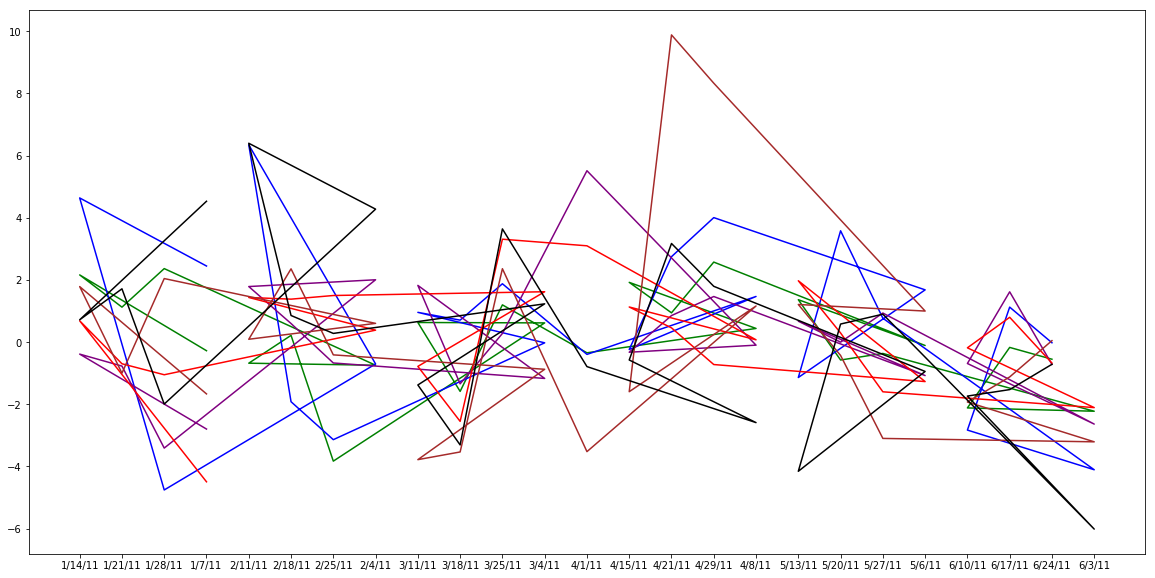

In [24]:
plt.plot(walmart_df['date'], walmart_df['percent_change_price'], color = 'green')
plt.plot(amex_df['date'], amex_df['percent_change_price'], color = 'blue')
plt.plot(att_df['date'], att_df['percent_change_price'], color = 'purple')
plt.plot(cola_df['date'], cola_df['percent_change_price'], color = 'red')
plt.plot(intel_df['date'], intel_df['percent_change_price'], color = 'brown')
plt.plot(disney_df['date'], disney_df['percent_change_price'], color = 'black')


#### Stock Market Price Changes Over Time

##### - This is percentage change in price throughout a week over two quarters.
##### -  We are looking at 6 different stocks in order from left to right, top to bottom: Walmart, American Express, AT&T, Coco Cola, Intel, and Walt Disney.
##### - A spike is a comparatively large upward or downward movement of a price in a short period of time. In this case, price changes throughout the week.
##### -  Intel has a large spike in price change - going form -2% changes in price to 10% changes in price within a week. 
##### -  Walmart is the least volalite in price changes over time. 


### Scatter Plot

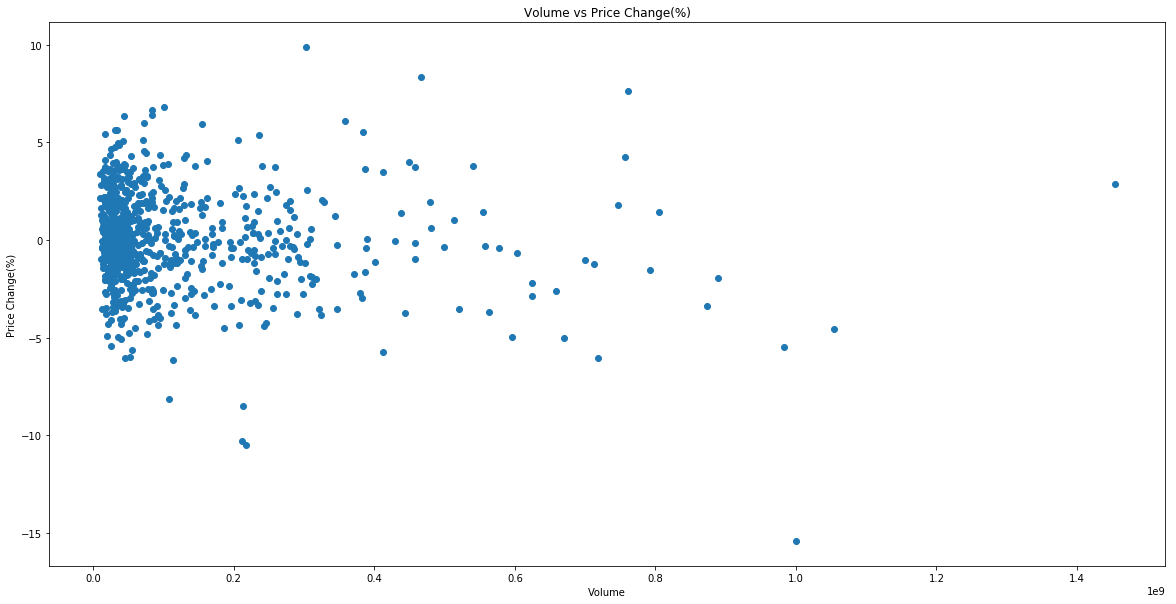

In [30]:
#draw Scatter plot for volume vs percent_change_price
plt.scatter(x=df['volume'], y=df['percent_change_price'])
plt.ylabel('Price Change(%)')
plt.xlabel('Volume')
plt.title('Volume vs Price Change(%)')
plt.show()

#### What is the Correlation between Price Change and Volume traded in Dow Jones Index for both Quarters?

##### - There is a saying on Wall Street that “it takes volume to move stock prices.”
##### - Scatter Plot looks at the relationship between price changes and volume if there is any. 
##### - A scatterplot with a linear association follows a straight line and non-linear association does not follow a straight line, but follows some sort of pattern, like a curve. A linear association has a reasonably constant rate of change. A non-linear association does not have a reasonably constant rate of change.
##### - Therefore, there appears to be no association between price change and volume traded. The data values in the scatterplot do not appear to follow a linear trend or a curved, non-linear trend.
##### - Majority of the data points have price changes between 5 and -5 and majority of the volume traded cluster around lower end of the volume traded. 
